In [1]:
%load_ext autoreload
%autoreload 2

ic| str_path: ('C:\\Users\\sceac10\\OneDrive - Cardiff '
               'University\\General\\resources\\Equipment_gain_profile_TM59.xlsx')
    sheet_name: 'Normalised'
ic| sum_profile: 1.0


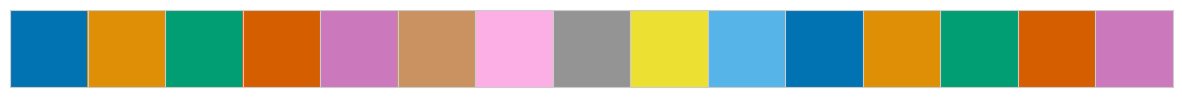

In [2]:
import sys
sys.path.insert(0, '..//src/')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import main
from common import enums, functions, schema
import geopandas as gpd
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size,
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "pdf"
dpi = 300
figsize = (12, 3.5)
figsize_map = (16, 8)
markers = ['P', 'o', '^', 's', '*', 'v']
linewidth = 0.1
edgecolor = 'black'
sns.palplot(sns.color_palette())

## PV gis data UKPN network

In [3]:
ukpn_pvgis_data_path = Path(
    r'C:\Users\sceac10\OneDrive - Cardiff University\General\data\Electricity substation data\ukpn\pv data\pv_gis'
)

def process_pv_gis_data(dataf: pd.DataFrame) -> pd.DataFrame:
  dataf = dataf.iloc[:8760].copy()
  dataf['P'] = dataf['P'].astype(float)
  dataf['time'] = pd.to_datetime(dataf['time'], format="%Y%m%d:%H%M")
  dataf = dataf.set_index('time')
  dataf = dataf.resample('1h').mean()
  return dataf


power_output_data = []

for file_path in ukpn_pvgis_data_path.rglob("*.csv"):
  print(file_path.stem)
  slope = int(file_path.stem.split("deg", 2)[1].rsplit("_", 1)[-1])
  print(slope)
  dataf = pd.read_csv(file_path, skiprows=[0, 6], header=6)
  dataf = process_pv_gis_data(dataf)
  new_name_col = f'P_{slope}_(W)'
  dataf = dataf.rename(columns={'P': new_name_col})
  power_output_data.append(dataf[new_name_col])

pv_outputs_df = pd.concat(power_output_data, axis=1)
pv_outputs_df['P_mean'] = pv_outputs_df.mean(axis=1)
pv_outputs_df.to_csv(ukpn_pvgis_data_path.parent/"summarised_pvgis_data.csv")
pv_outputs_df.head()

Timeseries_51.883_0.442_SA2_1kWp_crystSi_14_30deg_-45deg_2019_2019
-45
Timeseries_51.883_0.442_SA2_1kWp_crystSi_14_30deg_0deg_2019_2019
0
Timeseries_51.883_0.442_SA2_1kWp_crystSi_14_30deg_45deg_2019_2019
45


,P_-45_(W),P_0_(W),P_45_(W),P_mean
time,,,,
2019-01-01 00:00:00,0.0,0.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0
2019-01-01 02:00:00,0.0,0.0,0.0,0.0
2019-01-01 03:00:00,0.0,0.0,0.0,0.0
2019-01-01 04:00:00,0.0,0.0,0.0,0.0


Text(0.5, 0, '')

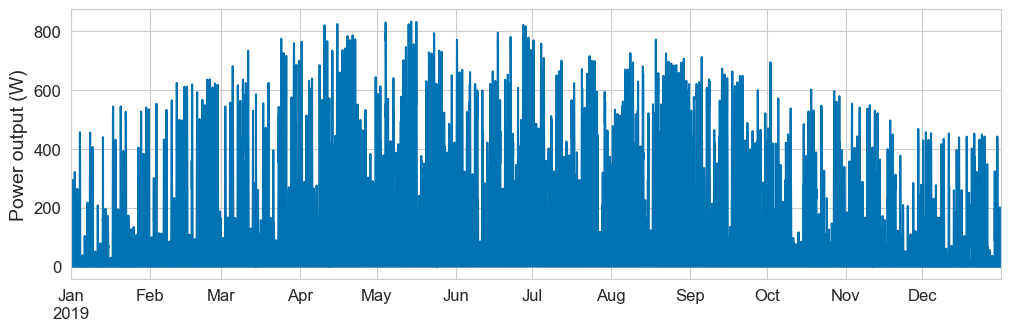

In [4]:
fig, ax = plt.subplots(figsize=figsize)
pv_outputs_df['P_mean'].plot(ax=ax)
ax.set_ylabel('Power output (W)')
ax.set_xlabel('')

Text(0.5, 0, '')

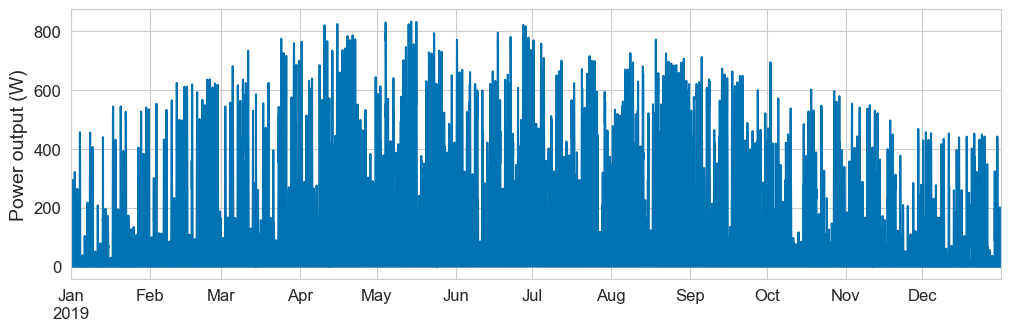

In [5]:
fig, ax = plt.subplots(figsize=figsize)
pv_outputs_df['P_mean'].plot(ax=ax)
# pv_outputs_df['P_mean'].resample('1m').mean().plot(ax=ax)
ax.set_ylabel('Power output (W)')
ax.set_xlabel('')

In [7]:
pv_outputs_df['P_mean'].sum()/1000

1024.5083333333334

In [ ]:
## UKPN DFES DATA AT LSOA LEVEL FOR 2050

In [8]:
ukpn_dfes_path = Path(
    r"C:\Users\sceac10\OneDrive - Cardiff University\General\data\Electricity substation data\ukpn"
)
fn = "DFES-2022--Leading_the_Way--Domestic-PV-capacity--LSOA.csv"
dfes_dataf = pd.read_csv(ukpn_dfes_path / fn, index_col=0)
dfes_dataf.head()

,LSOAs,2021 (kW),2022 (kW),2023 (kW),2024 (kW),2025 (kW),2026 (kW),2027 (kW),2028 (kW),2029 (kW),...,2041 (kW),2042 (kW),2043 (kW),2044 (kW),2045 (kW),2046 (kW),2047 (kW),2048 (kW),2049 (kW),2050 (kW)
LSOA11CD,,,,,,,,,,,,,,,,,,,,,
E01000001,City of London 001A,0,0,0,0,0,0,0,0,0,...,2,2,2,3,3,3,3,3,4,4
E01000002,City of London 001B,22,26,28,31,34,34,34,35,35,...,42,43,44,45,45,46,47,48,48,49
E01000003,City of London 001C,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
E01000005,City of London 001E,3,4,4,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
E01000006,Barking and Dagenham 016A,12,14,15,17,18,20,21,23,25,...,57,60,64,68,71,75,79,82,85,87


In [9]:
list_lsoas = dfes_dataf.index.unique()
len(list_lsoas)

10639

In [ ]:
## Extract cooling demand of LSOAs in ukpn

In [10]:
residential_data = main.import_thermal_characteristics_data(
    main.PATH_GB_DATA / 'Thermal_characteristics_afterEE.csv', 2020, 2050)
filt = residential_data['LSOA_code'].isin(list_lsoas)
residential_data = residential_data[filt]
residential_data = residential_data.reset_index()
list_la_code = list(residential_data['ladcd'].unique())
residential_data.head()

,Index,LSOA_code,Local Authority,Region,Dwelling forms,Heating systems,Average thermal capacity kJ/K,Average thermal losses kW/K,Number of dwellings,Average annual heat demand kWh,Average floor area m2,Thermal capacity level,Outdoor air design temperature degreeC,CIBSE_city,ladcd,ladnm
0,62870,E01000001,City of London,London,flat,oil boiler,20699.495206,0.190661,14,8115.289346,82.797981,medium,-2,Birmingham,E09000001,city of london
1,62871,E01000001,City of London,London,semi-detached,gas boiler,24487.644025,0.262593,2,11176.994057,97.950576,medium,-2,Birmingham,E09000001,city of london
2,62872,E01000001,City of London,London,terraced,gas boiler,46503.543701,0.467660,1,19905.482816,186.014175,medium,-2,Birmingham,E09000001,city of london
3,62873,E01000001,City of London,London,terraced,resistance heating,16315.000000,0.062456,11,2658.375704,65.260000,medium,-2,Birmingham,E09000001,city of london
4,62874,E01000001,City of London,London,flat,gas boiler,14463.409091,0.114664,107,4880.555556,57.853636,medium,-2,Birmingham,E09000001,city of london


In [11]:
import icecream as ic

PATH_RESULTS = Path(
    r'C:\Users\sceac10\OneDrive - Cardiff University\General\04 - Analysis\2050 high emission')

# PATH_RESULTS = Path(r'C:/Users/sceac10/OneDrive - Cardiff University/General/04 - Analysis/2050 high emission/simulation/city of london_E09000001/')

pathlist = (Path(PATH_RESULTS)/'simulation').rglob('*_total_heating_outputs.csv')


lsoa_to_index_dict = dict(residential_data.groupby('LSOA_code')['Index'].apply(list))

frames:dict[str, pd.Series] = {}
for temp_path in pathlist:
  ic.ic(temp_path)
  la_str = temp_path.stem.split('_total_heating_outputs')[0]
  la_code = la_str.split('_')[-1]
  ic.ic(la_code)
  if la_code in list_la_code:
    temp_sim_results = pd.read_csv(temp_path, index_col=0, parse_dates=True)
    temp_sim_results.columns = [int(x) for x in temp_sim_results.columns]
    for lsoa_code, list_index in lsoa_to_index_dict.items():
      list_index_in_file = [
          x for x in temp_sim_results.columns if x in list_index
      ]
      if len(list_index_in_file) > 0:
        ic.ic(lsoa_code)
        frames[lsoa_code] = -temp_sim_results[list_index].sum(axis=1)

ukpn_lsoa_cooling_demand = pd.concat(frames, axis=1)
ukpn_lsoa_cooling_demand.to_csv(ukpn_dfes_path/"ukpn_lsoa_cooling_demand.csv")

ic| temp_path: WindowsPath('C:/Users/sceac10/OneDrive - Cardiff University/General/04 - Analysis/2050 high emission/simulation/aberdeen city_S12000033/aberdeen city_S12000033_total_heating_outputs.csv')
ic| la_code: 'S12000033'
ic| temp_path: WindowsPath('C:/Users/sceac10/OneDrive - Cardiff University/General/04 - Analysis/2050 high emission/simulation/aberdeenshire_S12000034/aberdeenshire_S12000034_total_heating_outputs.csv')
ic| la_code: 'S12000034'
ic| temp_path: WindowsPath('C:/Users/sceac10/OneDrive - Cardiff University/General/04 - Analysis/2050 high emission/simulation/adur_E07000223/adur_E07000223_total_heating_outputs.csv')
ic| la_code: 'E07000223'
ic| lsoa_code: 'E01031338'
ic| lsoa_code: 'E01031339'
ic| lsoa_code: 'E01031340'
ic| lsoa_code: 'E01031341'
ic| lsoa_code: 'E01031342'
ic| lsoa_code: 'E01031343'
ic| lsoa_code: 'E01031344'
ic| lsoa_code: 'E01031345'
ic| lsoa_code: 'E01031346'
ic| lsoa_code: 'E01031347'
ic| lsoa_code: 'E01031348'
ic| lsoa_code: 'E01031349'
ic| lsoa_c

<AxesSubplot: xlabel='Time_(h)'>

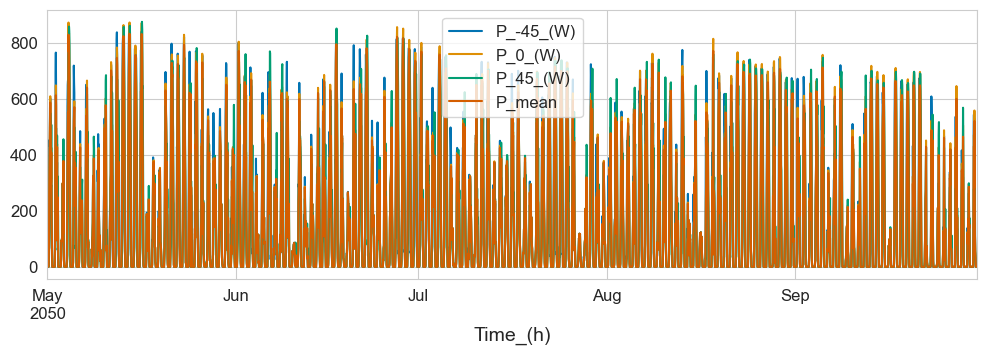

In [12]:
## Clip index and replace index with 2050 index from cooling demand data
filt = (pv_outputs_df.index.month >= 5) & (pv_outputs_df.index.month <= 9)
pv_outputs_df = pv_outputs_df[filt]
pv_outputs_df.index = ukpn_lsoa_cooling_demand.index
fig, ax = plt.subplots(figsize=figsize)
pv_outputs_df.plot(ax=ax)

In [13]:
target_year = 2050
filt = dfes_dataf.index.isin(ukpn_lsoa_cooling_demand.columns)
total_capacity_installed = dfes_dataf.loc[filt, f'{target_year} (kW)'].sum()
total_pv_generation = pv_outputs_df[
    'P_mean'] * total_capacity_installed / 1000000000 # in GWh
total_pv_generation = total_pv_generation.to_frame()
total_pv_generation.columns = ['PV_output']

In [ ]:
total_pv_generation.sum()

PV_output    2022.691197
dtype: float64

## UKPN results for the entire area

In [69]:
air_conditioner_efficiency = 3
total_cooling_demand = ukpn_lsoa_cooling_demand.sum(axis=1).to_frame()/1000000/air_conditioner_efficiency # in GWh
total_cooling_demand.columns = ['Electricity_for_cooling_demand']
total_data = pd.concat([total_pv_generation, total_cooling_demand], axis=1)
total_data.head()

,PV_output,Electricity_for_cooling_demand
Time_(h),,
2050-05-01 00:00:00,0.0,0.0
2050-05-01 01:00:00,0.0,0.0
2050-05-01 02:00:00,0.0,0.0
2050-05-01 03:00:00,0.0,0.0
2050-05-01 04:00:00,0.0,0.0


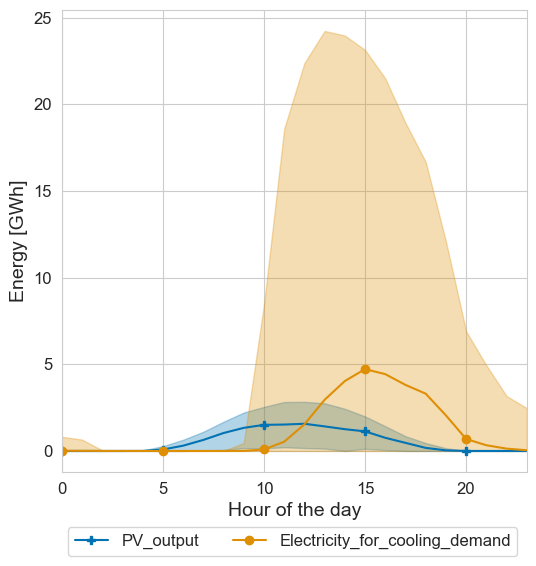

In [70]:
fig, ax = plt.subplots(figsize=(6,6))
average_week_day = total_data.groupby([total_data.index.hour]).mean().reset_index(drop=True)
max_week_day = total_data.groupby([total_data.index.hour]).max().reset_index(drop=True)
min_week_day = total_data.groupby([total_data.index.hour]).min().reset_index(drop=True)

for ii, c in enumerate(average_week_day.columns):
  average_week_day[c].plot(
        ax=ax,
        kind='line',
        marker=markers[ii],    markevery=5)
  ax.fill_between(average_week_day.index, min_week_day[c],max_week_day[c], color = sns.color_palette()[ii], alpha=0.3)
  
ax.set_ylabel('Energy [GWh]')
ax.set_xlabel('Hour of the day')
ax.margins(0, None)
ax.legend(bbox_to_anchor=(0.98, -0.12), ncol=4, borderaxespad=0.)

In [71]:
total_data['Net_electricity_for_cooling_demand'] = total_data['Electricity_for_cooling_demand'] - total_data['PV_output']
average_week_day = total_data.groupby([total_data.index.hour]).mean().reset_index(drop=True)
average_week_day.max()

PV_output                             1.568103
Electricity_for_cooling_demand        4.720501
Net_electricity_for_cooling_demand    3.672866
dtype: float64

In [17]:
## Calculate the net-demand as the difference between the cooling demand and the pv generation
target_year = 2050
frames_net_demand = {}
for lsoa_code in ukpn_lsoa_cooling_demand.columns:
  pv_capacity_installed = dfes_dataf.loc[lsoa_code, f'{target_year} (kW)']
  ic.ic(lsoa_code, pv_capacity_installed)
  pv_generation = pv_outputs_df['P_mean'] * pv_capacity_installed / 1000
  frames_net_demand[lsoa_code] = (ukpn_lsoa_cooling_demand[lsoa_code]/air_conditioner_efficiency -
                                  pv_generation)
net_demand_df = pd.concat(frames_net_demand, axis=1)

ic| lsoa_code: 'E01031338', pv_capacity_installed: 150
ic| lsoa_code: 'E01031339', pv_capacity_installed: 399
ic| lsoa_code: 'E01031340', pv_capacity_installed: 412
ic| lsoa_code: 'E01031341', pv_capacity_installed: 317
ic| lsoa_code: 'E01031342', pv_capacity_installed: 392
ic| lsoa_code: 'E01031343', pv_capacity_installed: 303
ic| lsoa_code: 'E01031344', pv_capacity_installed: 484
ic| lsoa_code: 'E01031345', pv_capacity_installed: 365
ic| lsoa_code: 'E01031346', pv_capacity_installed: 406
ic| lsoa_code: 'E01031347', pv_capacity_installed: 274
ic| lsoa_code: 'E01031348', pv_capacity_installed: 315
ic| lsoa_code: 'E01031349', pv_capacity_installed: 253
ic| lsoa_code: 'E01031350', pv_capacity_installed: 340
ic| lsoa_code: 'E01031351', pv_capacity_installed: 715
ic| lsoa_code: 'E01031352', pv_capacity_installed: 192
ic| lsoa_code: 'E01031353', pv_capacity_installed: 509
ic| lsoa_code: 'E01031354', pv_capacity_installed: 133
ic| lsoa_code: 'E01031355', pv_capacity_installed: 390
ic| lsoa_c

In [94]:
max_headroom = ukpn_lsoa_cooling_demand.max()/air_conditioner_efficiency/1000
max_headroom = max_headroom.reset_index()
max_headroom.columns = ["LSOA", "Peak demand (GW)"]
max_headroom['Name'] = "Max - Electricity for cooling demand"

q95_headroom = ukpn_lsoa_cooling_demand.quantile(0.95)/air_conditioner_efficiency/1000
q95_headroom = q95_headroom.reset_index()
q95_headroom.columns = ["LSOA", "Peak demand (GW)"]
q95_headroom['Name'] = "95% percentiles -Electricity for cooling demand"
q95_headroom.head()

,LSOA,Peak demand (GW),Name
0,E01031338,0.773635,95% percentiles -Electricity for cooling demand
1,E01031339,0.690758,95% percentiles -Electricity for cooling demand
2,E01031340,1.073761,95% percentiles -Electricity for cooling demand
3,E01031341,0.795551,95% percentiles -Electricity for cooling demand
4,E01031342,1.125381,95% percentiles -Electricity for cooling demand


In [95]:
net_max_headroom = (net_demand_df.max()/1000).reset_index()
net_max_headroom.columns = ["LSOA", "Peak demand (GW)"]
net_max_headroom['Name'] = "Max - Net electricity for cooling demand"

net_q95_headroom = (net_demand_df.quantile(0.95)/1000).reset_index()
net_q95_headroom.columns = ["LSOA", "Peak demand (GW)"]
net_q95_headroom['Name'] = "95% percentiles - Net electricity for cooling demand"

additional_headroom = pd.concat([max_headroom, q95_headroom, net_max_headroom, net_q95_headroom])

c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\degree_days\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\degree_days\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\degree_days\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Additional headroom (GW)')

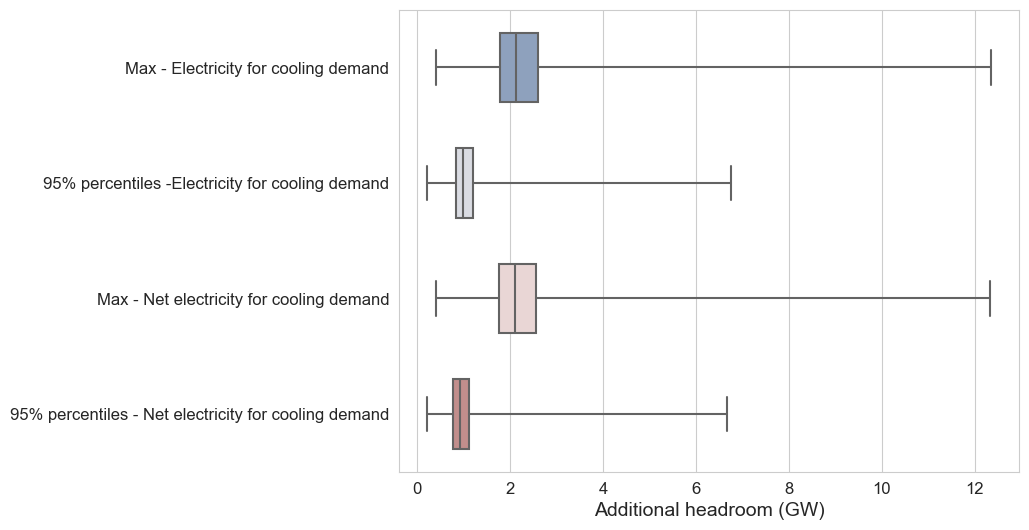

In [97]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    additional_headroom, x="Peak demand (GW)",  y='Name',
    whis=[0, 100], width=.6, palette="vlag"
)
ax.set_ylabel('')
ax.set_xlabel('Additional headroom (GW)')

In [90]:
pd.pivot_table(additional_headroom, values='Peak demand (GW)', columns='Name', index='LSOA').describe()

Name,95% percentiles - Cooling demand,95% percentiles - Cooling demand\nminus PV generation,Max - Cooling demand,Max - Cooling demand\nminus PV generation
count,10639.000000,10639.000000,10639.000000,10639.000000
mean,1.050978,0.981784,2.277936,2.243712
std,0.334798,0.319948,0.740756,0.731966
min,0.221047,0.220660,0.408312,0.407563
25%,0.830057,0.769887,1.793332,1.763734
50%,0.984280,0.916503,2.136073,2.102810
75%,1.194388,1.120094,2.603108,2.563801
max,6.743445,6.677849,12.344399,12.315956


In [93]:
(2.102810-2.136073)/2.136073

-0.01557203335279284

In [91]:
(0.916503-0.984280)/0.984280

-0.06885947088226936

In [18]:
net_demand_df = net_demand_df.max().reset_index()
net_demand_df.columns = ["LSOA", "Peak demand (MW)"]
net_demand_df['Name'] = "Cooling demand\nminus PV generation"

c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\degree_days\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\degree_days\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sceac10\OneDrive - Cardiff University\General\code\degree-days-analysis\degree_days\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot: xlabel='Name', ylabel='Peak demand (MW)'>

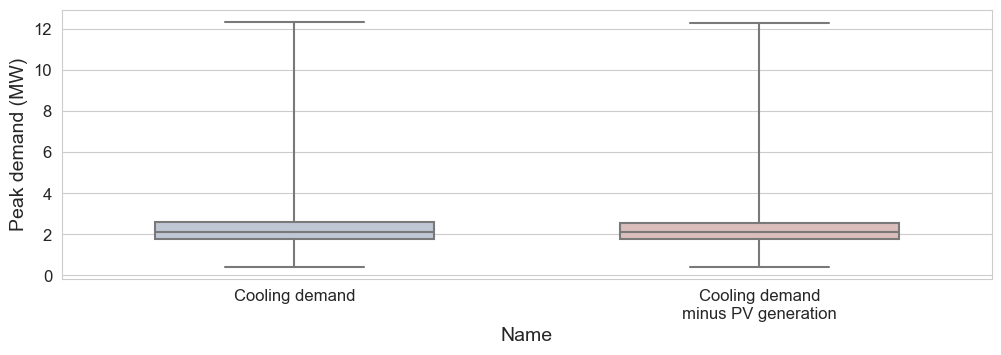

In [19]:
fig, ax = plt.subplots(figsize=figsize)
peak_demand = ukpn_lsoa_cooling_demand.max()/air_conditioner_efficiency

peak_demand = peak_demand.reset_index()
peak_demand.columns = ["LSOA", "Peak demand (MW)"]
peak_demand['Name'] = "Cooling demand"
peak_demand = pd.concat([peak_demand, net_demand_df])
peak_demand["Peak demand (MW)"] = peak_demand["Peak demand (MW)"]/1000
# # Plot the orbital period with horizontal boxes
sns.boxplot(
    peak_demand, x='Name',  y="Peak demand (MW)",
    whis=[0, 100], width=.6, palette="vlag"
)

# # Add in points to show each observation
# sns.stripplot(planets, x="distance", y="method", size=4, color=".3")

In [28]:
net_demand_df.head()

,LSOA,Peak demand (MW),Name
0,E01031338,1718.957498,Cooling demand\nminus PV generation
1,E01031339,1478.078784,Cooling demand\nminus PV generation
2,E01031340,2379.281714,Cooling demand\nminus PV generation
3,E01031341,1601.056993,Cooling demand\nminus PV generation
4,E01031342,2337.564029,Cooling demand\nminus PV generation


In [ ]:
lsoa_code

'E01031369'

In [20]:
def plot_map(map_df,
             target,
             ax,
             vmin=None,
             vmax=None,
             cmap=None,
             legend=False, label_legend:str=''):

  # map_df = map_df.dropna(subset=[target])
  # create figure and axes for Matplotlib
  if vmin is None:
    if map_df[target].min() < 0:
      vmin = map_df[target].min()
    else:
      vmin = 0
  if vmax is None:
    vmax = map_df[target].max()

  if cmap == None:
    cmap = 'Blues'

  ax.axis('off')
  ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

  map_df = map_df.to_crs(epsg=3395)  # mercator projections

  if legend:
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.1)
    map = map_df.plot(column=target,
                      cmap=cmap,
                      linewidth=0.01,
                      ax=ax,
                      edgecolor='black',
                      vmin=vmin,
                      vmax=vmax,
                      legend=legend,
                      legend_kwds={
                          "label": label_legend,
                          "orientation": "horizontal"
                      },
                      cax=cax)
  else:
    map = map_df.plot(column=target,
                      cmap=cmap,
                      linewidth=0.01,
                      ax=ax,
                      edgecolor='black',
                      vmin=vmin,
                      vmax=vmax)
  plt.close()
  return map


In [21]:
path_map =  Path(r"C:\Users\sceac10\OneDrive - Cardiff University\04 - Projects\00 - Final data\maps")
file = "UK_2011_Census_boundaries_LSOA_fixed.geojson"
path_map = path_map/file
map_df = gpd.read_file(path_map)
filt = map_df['GeographyCode'].isin(dfes_dataf.index)
map_df.head()

,OBJECTID,AREA_ID,AREA_NAME,MaxSimpTol,MinSimpTol,OBJECTID_1,GeographyCode,KS601EW0001,KS601EW0002,KS601EW0003,...,KS601EW0014,KS601EW0015,Full_time_PC,Part_time_PC,Unemployed_PC,Retired_PC,_errors,layer,path,geometry
0,1024,E01027993,Ashfield 012C,75,75.00,34840.0,E01027993,1158.0,197.0,409.0,...,2.0,17.0,35.319516,17.012090,3.626943,20.811744,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((-1.30514 53.04483, -1.30785 53..."
1,48,E01020056,Mid Devon 008C,75,75.00,27061.0,E01020056,1517.0,201.0,488.0,...,3.0,9.0,32.168754,13.249835,2.241266,13.843111,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((-3.41207 50.80506, -3.41064 50..."
2,271,E01024364,Maidstone 017A,75,18.75,31279.0,E01024364,1162.0,157.0,384.0,...,6.0,7.0,33.046472,13.511188,2.581756,19.018933,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((0.63841 51.14202, 0.63435 51.1..."
3,636,E01018284,South Cambridgeshire 003C,75,75.00,25312.0,E01018284,932.0,160.0,417.0,...,1.0,5.0,44.742489,17.167382,1.609442,14.377682,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((-0.00408 52.26949, -0.02667 52..."
4,3080,E01027595,Hambleton 010B,75,75.00,34445.0,E01027595,1158.0,182.0,414.0,...,4.0,6.0,35.751295,15.716753,2.072539,19.170984,Nested shells,Fixed geometries,MultiPolygon?crs=EPSG:4326&field=OBJECTID:inte...,"MULTIPOLYGON (((-1.18272 54.04060, -1.18525 54..."


#### PV capacity installed at LSOA level

In [22]:
target_year = 2050
pv_installed_capacity_2050 = dfes_dataf.loc[:, f'{target_year} (kW)'].to_frame()
pv_installed_capacity_2050.columns = ["PV capacity installed (kW)"]
pv_installed_capacity_2050.head()

,PV capacity installed (kW)
LSOA11CD,
E01000001,4
E01000002,49
E01000003,1
E01000005,5
E01000006,87


In [ ]:
pv_installed_capacity_2050.sum()/1000000

PV capacity installed (kW)    3.403939
dtype: float64

In [23]:
map_df = pd.merge(map_df, pv_installed_capacity_2050, left_on='GeographyCode', right_index=True)

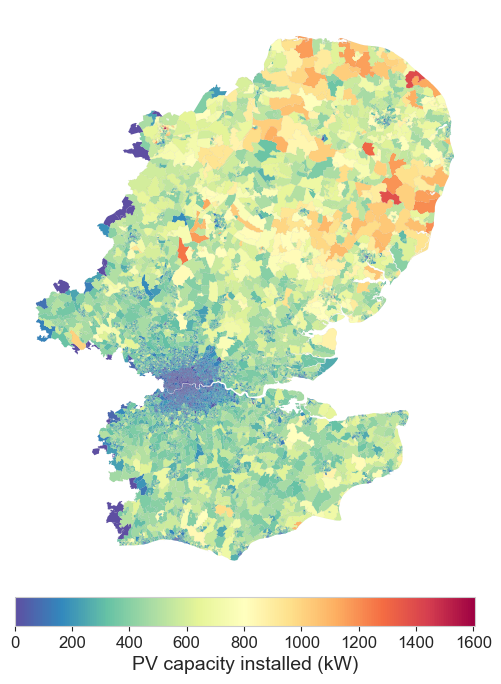

In [24]:
fig, ax = plt.subplots(figsize=(figsize_map))
cmap_1 = 'Spectral_r'
target = "PV capacity installed (kW)"
plot_map(map_df, target, ax, cmap=cmap_1, legend=True, label_legend="PV capacity installed (kW)")
# ax.set_title('Headroom demand in 2050 excl. cooling demand')
fig

#### Cooling demand at LSOA level

In [25]:
cooling_demand = ukpn_lsoa_cooling_demand.sum().to_frame()/1000000
cooling_demand.columns = ['Cooling_demand_(GWh)']

In [26]:
filt = map_df['GeographyCode'].isin(cooling_demand.index)
map_df = map_df[filt]
map_df = pd.merge(map_df, cooling_demand, left_on='GeographyCode', right_index=True)

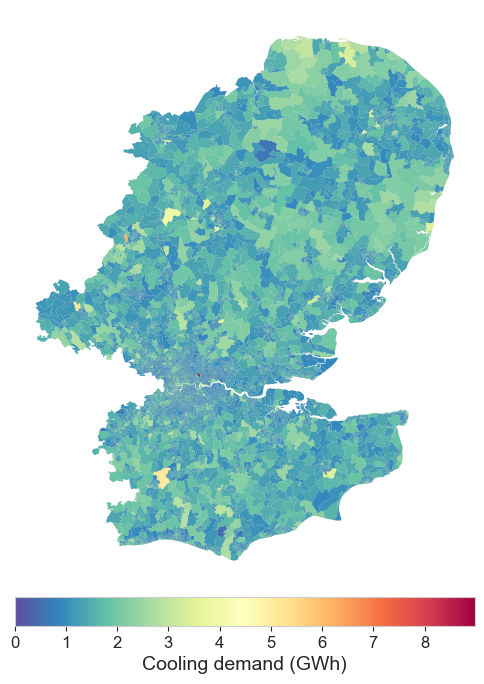

In [98]:
fig, ax = plt.subplots(figsize=(figsize_map))
cmap_1 = 'Spectral_r'
target = 'Cooling_demand_(GWh)'
plot_map(map_df, target, ax, cmap=cmap_1, legend=True, label_legend='Cooling demand (GWh)')
# ax.set_title('Headroom demand in 2050 excl. cooling demand')
fig